## Data Challenge: RealCrowd risk of loss model

Goal: Clean and analyze select CMBS data from issuer BACM

In [191]:
# Imports for data analysis and visualization

import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [196]:
# Import model data from csv file

file = 'model_data'
parse_dates = ['NoteDate', 'MaturityDate']

model_df = pd.read_csv(file, parse_dates=parse_dates)

In [197]:
# Check first few rows of model_df DataFrame

model_df.head()

,Unnamed: 0,LoanNumber,ZipCode,PropertyType,OccupancyPercent,NoteDate,MaturityDate,AppraisalValue,MostRecentNOI,FullYearNOI,U/WDSCR,CutoffDateLTVRatio
0,0,57797,92056,Multifamily,0.9583,2004-02-09,2009-03-01,27700000,1932728.00,1520275.0,1.286974,0.721225
1,1,6120,64154,Multifamily,0.8971,2003-11-10,2013-12-01,26290000,1280936.79,NaN,1.315628,0.757323
2,2,57799,78230,Multifamily,0.9148,2004-02-04,2011-03-01,15500000,1160054.00,1237050.0,1.254295,0.800000
3,3,7750,89119,Multifamily,0.9427,2003-12-23,2014-01-01,12200000,1123545.82,909863.0,1.405656,0.797632
4,4,39285,10456,Multifamily,0.975,2003-12-31,2009-01-01,4600000,354811.00,355515.0,1.439771,0.783622


In [198]:
# Drop redundant index column

model_df = model_df.drop('Unnamed: 0', 1)
model_df.head()

,LoanNumber,ZipCode,PropertyType,OccupancyPercent,NoteDate,MaturityDate,AppraisalValue,MostRecentNOI,FullYearNOI,U/WDSCR,CutoffDateLTVRatio
0,57797,92056,Multifamily,0.9583,2004-02-09,2009-03-01,27700000,1932728.00,1520275.0,1.286974,0.721225
1,6120,64154,Multifamily,0.8971,2003-11-10,2013-12-01,26290000,1280936.79,NaN,1.315628,0.757323
2,57799,78230,Multifamily,0.9148,2004-02-04,2011-03-01,15500000,1160054.00,1237050.0,1.254295,0.800000
3,7750,89119,Multifamily,0.9427,2003-12-23,2014-01-01,12200000,1123545.82,909863.0,1.405656,0.797632
4,39285,10456,Multifamily,0.975,2003-12-31,2009-01-01,4600000,354811.00,355515.0,1.439771,0.783622


In [199]:
# Add 'LoanAge' column

model_df['LoanAge'] = model_df['MaturityDate'] - model_df['NoteDate']
model_df.head()

,LoanNumber,ZipCode,PropertyType,OccupancyPercent,NoteDate,MaturityDate,AppraisalValue,MostRecentNOI,FullYearNOI,U/WDSCR,CutoffDateLTVRatio,LoanAge
0,57797,92056,Multifamily,0.9583,2004-02-09,2009-03-01,27700000,1932728.00,1520275.0,1.286974,0.721225,1847 days
1,6120,64154,Multifamily,0.8971,2003-11-10,2013-12-01,26290000,1280936.79,NaN,1.315628,0.757323,3674 days
2,57799,78230,Multifamily,0.9148,2004-02-04,2011-03-01,15500000,1160054.00,1237050.0,1.254295,0.800000,2582 days
3,7750,89119,Multifamily,0.9427,2003-12-23,2014-01-01,12200000,1123545.82,909863.0,1.405656,0.797632,3662 days
4,39285,10456,Multifamily,0.975,2003-12-31,2009-01-01,4600000,354811.00,355515.0,1.439771,0.783622,1828 days


In [15]:
# Check data types in 

model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785 entries, 0 to 784
Data columns (total 12 columns):
LoanNumber            785 non-null object
ZipCode               785 non-null object
PropertyType          785 non-null object
OccupancyPercent      781 non-null object
NoteDate              600 non-null datetime64[ns]
MaturityDate          600 non-null datetime64[ns]
AppraisalValue        785 non-null int64
MostRecentNOI         572 non-null float64
FullYearNOI           522 non-null float64
U/WDSCR               600 non-null float64
CutoffDateLTVRatio    600 non-null float64
LoanAge               600 non-null timedelta64[ns]
dtypes: datetime64[ns](2), float64(4), int64(1), object(4), timedelta64[ns](1)
memory usage: 73.7+ KB


In [200]:
# Plotting function

def plotData(colName):
    
    '''Function for plotting data in a given a column name of model_df DataFrame'''
    
    values = model_df[colName].dropna()
    plot = sns.distplot(values, bins=50, color='k', kde=False)
    
    return plot

---------

### Zip code: distribution plot

In [132]:
zipCode = model_df['ZipCode'][(model_df['ZipCode'] != 'Various') & 
                              (model_df['ZipCode'] != 'Multiple') &
                              (model_df['ZipCode'] != '23059/23192')]
zipCode = zipCode.dropna().astype(float)
zipCode.describe()

count      760.000000
mean     54298.526316
std      31064.413010
min       1020.000000
25%      29883.250000
50%      49853.000000
75%      85249.500000
max      99508.000000
Name: ZipCode, dtype: float64

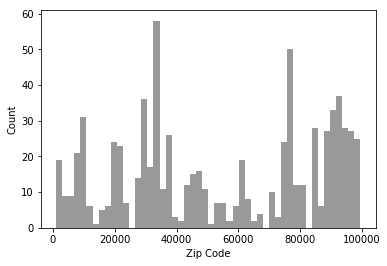

In [204]:
plot = sns.distplot(zipCode, bins=50, color='k', kde=False)
plt.xlabel('Zip Code')
plt.ylabel('Count')
plt.savefig('zipCodedist.pdf', bbox_inches='tight');

---------

### Property Type: distribution plot

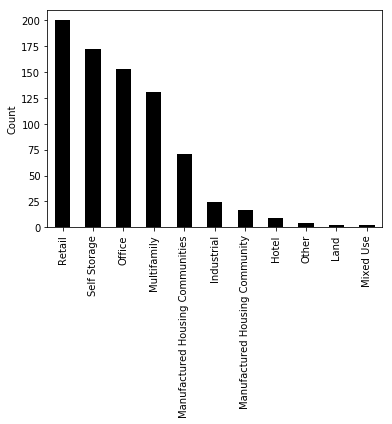

In [203]:
model_df['PropertyType'].value_counts().plot(kind='bar', color='k')
plt.ylabel('Count')
plt.savefig('propertyTypeDist.pdf', bbox_inches='tight');

---------

### Appraisal value: distribution plots

In [85]:
# Summary statistics of appraisal value in millions of dollars

(model_df['AppraisalValue'] / 1e6).describe()

count    785.000000
mean      18.527446
std       54.803985
min        0.450000
25%        4.500000
50%        7.970000
75%       16.200000
max      845.000000
Name: AppraisalValue, dtype: float64

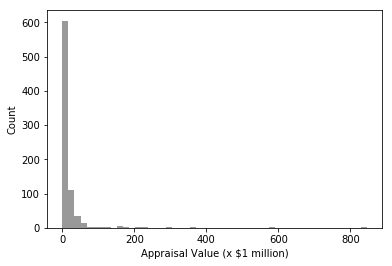

In [205]:
values = (model_df['AppraisalValue'].dropna())/ 1e6
plot = sns.distplot(values, bins=50, color='k', kde=False)
plt.xlabel('Appraisal Value (x $1 million)')
plt.ylabel('Count')
plt.savefig('appraisalValueDist1.pdf', bbox_inches='tight');

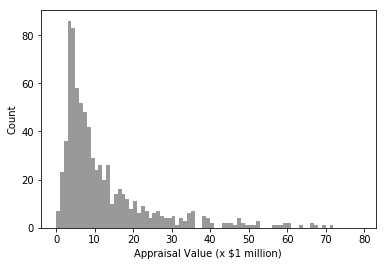

In [206]:
values = (model_df['AppraisalValue'].dropna())/ 1e6
plot = sns.distplot(values, bins=range(0,80,1), color='k', kde=False)
plt.xlabel('Appraisal Value (x $1 million)')
plt.ylabel('Count')
plt.savefig('appraisalValueDist2.pdf', bbox_inches='tight');

----------

### Loan age: distribution plot

In [53]:
model_df['LoanAge'].describe()

count                         600
mean           3222 days 23:02:24
std      866 days 23:17:30.381921
min            1739 days 00:00:00
25%            2566 days 18:00:00
50%            3660 days 00:00:00
75%            3674 days 00:00:00
max            5505 days 00:00:00
Name: LoanAge, dtype: object

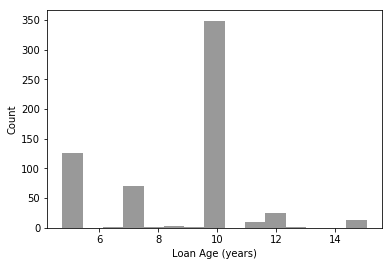

In [207]:
loan_deltas = model_df['LoanAge'].dropna()
years = loan_deltas / pd.Timedelta(days=1) / 365.25
sns.distplot(years, color='k', kde=False)
plt.xlabel('Loan Age (years)')
plt.ylabel('Count')
plt.savefig('loanAgeDist.pdf', bbox_inches='tight');

------------

### Occupancy Rate: distribution plot

In [154]:
occPer = model_df['OccupancyPercent'][(model_df['OccupancyPercent'] != 'Various') & 
                                      (model_df['OccupancyPercent'] != '70.2% Hotel / 97.2% Office')]
occPer = occPer.dropna().astype(float)
(occPer*100).describe()

count    778.000000
mean      91.558322
std       10.089613
min       27.440147
25%       88.183750
50%       94.564291
75%       99.607500
max      100.000000
Name: OccupancyPercent, dtype: float64

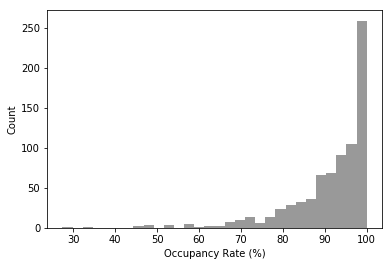

In [208]:
sns.distplot(occPer*100, color='k', kde=False)
plt.xlabel('Occupancy Rate (%)')
plt.ylabel('Count')
plt.savefig('occupancyRateDist.pdf', bbox_inches='tight');

---------

### Most recent net operating income: distribution plots

In [169]:
(model_df['MostRecentNOI'].dropna() / 1e6).describe()

count    572.000000
mean       1.596324
std        4.602968
min        0.000000
25%        0.389481
50%        0.734578
75%        1.394307
max       59.931759
Name: MostRecentNOI, dtype: float64

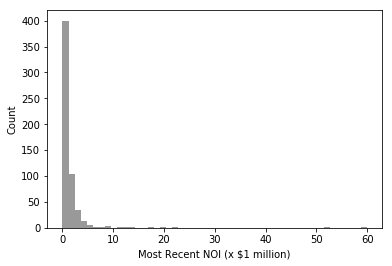

In [209]:
values = (model_df['MostRecentNOI'].dropna())/ 1e6
plot = sns.distplot(values, bins=50, color='k', kde=False)
plt.xlabel('Most Recent NOI (x $1 million)')
plt.ylabel('Count')
plt.savefig('recentNOIDist1.pdf', bbox_inches='tight');

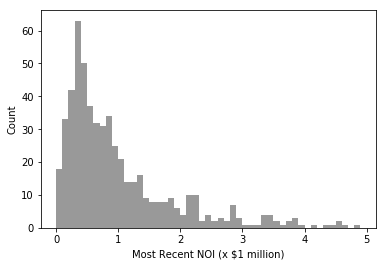

In [210]:
values = (model_df['MostRecentNOI'].dropna())/ 1e6
plot = sns.distplot(values, bins=np.arange(0,5,0.1), color='k', kde=False)
plt.xlabel('Most Recent NOI (x $1 million)')
plt.ylabel('Count')
plt.savefig('recentNOIDist2.pdf', bbox_inches='tight');

---------

### Full year net operating income: distribution plots

In [176]:
(model_df['FullYearNOI'].dropna() / 1e6).describe()

count    522.000000
mean       1.575290
std        4.973022
min       -0.105979
25%        0.357725
50%        0.647948
75%        1.296526
max       66.132988
Name: FullYearNOI, dtype: float64

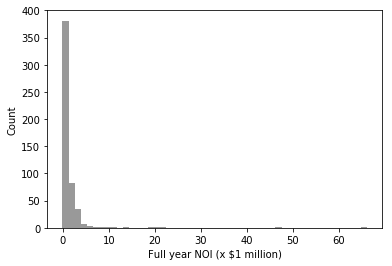

In [211]:
values = (model_df['FullYearNOI'].dropna())/ 1e6
plot = sns.distplot(values, bins=50, color='k', kde=False)
plt.xlabel('Full year NOI (x $1 million)')
plt.ylabel('Count')
plt.savefig('fullyearNOIDist1.pdf', bbox_inches='tight');

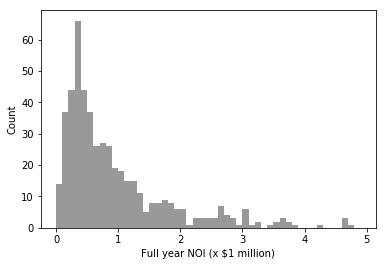

In [212]:
values = (model_df['FullYearNOI'].dropna())/ 1e6
plot = sns.distplot(values, bins=np.arange(0,5,0.1), color='k', kde=False)
plt.xlabel('Full year NOI (x $1 million)')
plt.ylabel('Count')
plt.savefig('fullyearNOIDist2.pdf', bbox_inches='tight');

---------

### Debt service coverage ratio at underwriting: distribution plots

In [178]:
model_df['U/WDSCR'].describe()

count    600.000000
mean       1.494098
std        0.456630
min        1.126970
25%        1.261026
50%        1.348300
75%        1.520382
max        7.106962
Name: U/WDSCR, dtype: float64

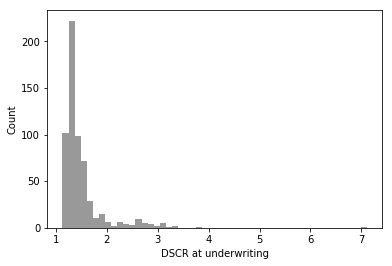

In [213]:
plotData('U/WDSCR')
plt.xlabel('DSCR at underwriting')
plt.ylabel('Count')
plt.savefig('dscrDist1.pdf', bbox_inches='tight');

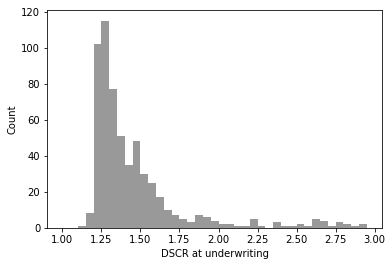

In [214]:
values = model_df['U/WDSCR'].dropna()
plot = sns.distplot(values, bins=np.arange(1,3,0.05), color='k', kde=False)
plt.xlabel('DSCR at underwriting')
plt.ylabel('Count')
plt.savefig('dscrDist2.pdf', bbox_inches='tight');

---------

### Loan-to-value ratio at cutoff date: distribution plot

In [180]:
model_df['CutoffDateLTVRatio'].describe()

count    600.000000
mean       0.700636
std        0.103797
min        0.142487
25%        0.654407
50%        0.736981
75%        0.781694
max        0.855409
Name: CutoffDateLTVRatio, dtype: float64

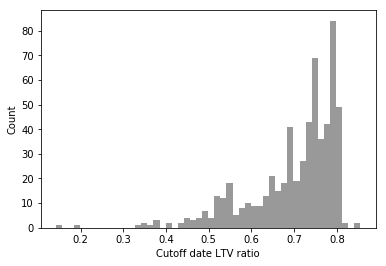

In [215]:
plotData('CutoffDateLTVRatio')
plt.xlabel('Cutoff date LTV ratio')
plt.ylabel('Count')
plt.savefig('ltvDist.pdf', bbox_inches='tight');

---------

### Correlation matrix

In [217]:
model_df.corr()

,AppraisalValue,MostRecentNOI,FullYearNOI,U/WDSCR,CutoffDateLTVRatio
AppraisalValue,1.000000,0.990950,0.993109,0.234146,-0.248727
MostRecentNOI,0.990950,1.000000,0.994326,0.300290,-0.265276
FullYearNOI,0.993109,0.994326,1.000000,0.242528,-0.246359
U/WDSCR,0.234146,0.300290,0.242528,1.000000,-0.673234
CutoffDateLTVRatio,-0.248727,-0.265276,-0.246359,-0.673234,1.000000


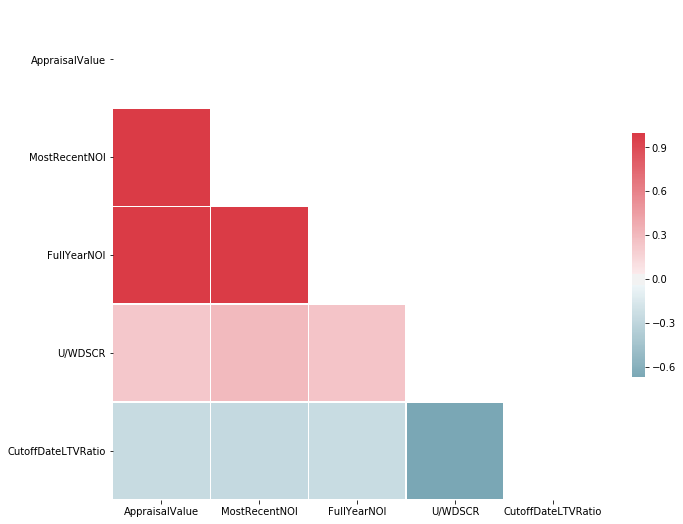

In [221]:
# Make DataFrame

# Compute the correlation matrix
corr = model_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.savefig('corrMatrix.pdf', bbox_inches='tight');